## 2. Cities in Sweden - real dataset


Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB.

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (\*)


In [2]:
import pandas as pd

df = pd.read_excel("../../data/komtopp50_2020.xlsx", sheet_name="Totalt")

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


&nbsp; b) Clean your data so that the head looks like this: (\*)

|     | Rang 2020 | Rang 2019 | Kommun   | Folkmängd 2020 | Folkmängd 2019 | Förändring |
| --: | --------: | --------: | :------- | -------------: | -------------: | ---------: |
|   0 |        83 |        84 | Ale      |          31868 |          31402 |    1.48398 |
|   1 |        64 |        64 | Alingsås |          41602 |          41420 |   0.439401 |
|   2 |       123 |       123 | Alvesta  |          20224 |          20134 |   0.447005 |
|   3 |       255 |       255 | Aneby    |           6821 |           6848 |  -0.394276 |
|   4 |       169 |       167 | Arboga   |          14039 |


In [3]:
def clean_data(df):
    df = (
        df.iloc[6:]
        .rename(
            columns={
                "Unnamed: 0": "Rang 2020",
                "Unnamed: 1": "Rang 2019",
                "Unnamed: 2": "Kommun",
                "Unnamed: 3": "Folkmängd 2020",
                "Unnamed: 4": "Folkmängd 2019",
                "Unnamed: 5": "Förändring",
            }
        )
        .sort_values(by="Kommun")
        .reset_index(drop=True)
    )

    df["Rang 2019"] = df["Rang 2019"].astype(int)
    df["Rang 2020"] = df["Rang 2020"].astype(int)
    df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
    df["Folkmängd 2020"] = df["Folkmängd 2020"].astype(int)

    return df


clean_df = clean_data(df)

clean_df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074


## 3. Cities in Sweden - gender

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (\*)

Male:

|     | Rang 2020 | Rang 2019 | Kommun   | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön |
| --: | --------: | --------: | :------- | -------------: | -------------: | ---------: | :-- |
|   0 |        81 |        83 | Ale      |          16256 |          16054 |    1.25825 | Man |
|   1 |        64 |        64 | Alingsås |          20702 |          20646 |   0.271239 | Man |
|   2 |       122 |       123 | Alvesta  |          10367 |          10339 |   0.270819 | Man |
|   3 |       255 |       255 | Aneby    |           3503 |           3498 |   0.142939 | Man |
|   4 |       169 |       168 | Arboga   |           7094 |           7114 |  -0.281136 | Man |

Female:

|     | Rang 2020 | Rang 2019 | Kommun   | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön    |
| --: | --------: | --------: | :------- | -------------: | -------------: | ---------: | :----- |
|   0 |        84 |        85 | Ale      |          15612 |          15348 |    1.72009 | Kvinna |
|   1 |        64 |        64 | Alingsås |          20900 |          20774 |   0.606527 | Kvinna |
|   2 |       123 |       123 | Alvesta  |           9857 |           9795 |   0.632976 | Kvinna |
|   3 |       255 |       255 | Aneby    |           3318 |           3350 |  -0.955224 | Kvinna |
|   4 |       165 |       164 | Arboga   |           6945 |           6973 |  -0.401549 | Kvinna |


In [4]:
male_df = pd.read_excel("../../data/komtopp50_2020.xlsx", sheet_name="Män")
female_df = df = pd.read_excel("../../data/komtopp50_2020.xlsx", sheet_name="Kvinnor")

male_df = clean_data(male_df)
female_df = clean_data(female_df)

male_df["Kön"] = "Man"
female_df["Kön"] = "Kvinna"

female_df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now. (\*)

|     | Kommun     | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön    |
| --: | :--------- | -------------: | -------------: | ---------: | :----- |
|   0 | Ale        |          16256 |          16054 |    1.25825 | Man    |
|   1 | Alingsås   |          20702 |          20646 |   0.271239 | Man    |
| ... | ...        |            ... |            ... |        ... | ...    |
| 288 | Överkalix  |           1559 |           1578 |   -1.20406 | Kvinna |
| 289 | Övertorneå |           2027 |           2065 |   -1.84019 | Kvinna |


In [5]:
merged_df = pd.concat([male_df, female_df]).set_index("Kommun")
merged_df = merged_df.drop(columns=["Rang 2020", "Rang 2019"])

merged_df

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,
Ale,16256,16054,1.258253,Man
Alingsås,20702,20646,0.271239,Man
Alvesta,10367,10339,0.270819,Man
Aneby,3503,3498,0.142939,Man
Arboga,7094,7114,-0.281136,Man
...,...,...,...,...
Österåker,22997,22442,2.473042,Kvinna
Östhammar,10846,10803,0.398038,Kvinna
Östra Göinge,7270,7262,0.110162,Kvinna


c) Extract and change column name from the total DataFrame so that the head look like this:

|     | Kommun   | Total Pop 2020 | Total Pop 2019 | Total förändring |
| --: | :------- | -------------: | -------------: | ---------------: |
|   0 | Ale      |          31868 |          31402 |          1.48398 |
|   1 | Alingsås |          41602 |          41420 |         0.439401 |
|   2 | Alvesta  |          20224 |          20134 |         0.447005 |
|   3 | Aneby    |           6821 |           6848 |        -0.394276 |
|   4 | Arboga   |          14039 |          14087 |         -0.34074 |


In [6]:
total_df = pd.read_excel("../../data/komtopp50_2020.xlsx", sheet_name="Totalt")

total_df = clean_data(total_df)
total_df.drop(columns=["Rang 2020", "Rang 2019"], axis=1, inplace=True)
total_df = total_df.rename(
    columns={
        "Folkmängd 2020": "Total Pop 2020",
        "Folkmängd 2019": "Total Pop 2019",
        "Förändring": "Total förändring",
    }
)

total_df.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074


&nbsp; d) Merge this data with the data in b) so that the head look like this: (\*)

| Kommun    | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön    | Total Pop 2020 | Total Pop 2019 | Total förändring |
| :-------- | -------------: | -------------: | ---------: | :----- | -------------: | -------------: | ---------------: |
| Stockholm |         482982 |         482220 |   0.158019 | Man    |         975551 |         974073 |         0.151734 |
| Stockholm |         492569 |         491853 |   0.145572 | Kvinna |         975551 |         974073 |         0.151734 |
| Göteborg  |         292505 |         290308 |   0.756782 | Man    |         583056 |         579281 |          0.65167 |
| Göteborg  |         290551 |         288973 |   0.546072 | Kvinna |         583056 |         579281 |          0.65167 |
| Malmö     |         175411 |         173543 |    1.07639 | Kvinna |         347949 |         344166 |          1.09918 |


In [7]:
merged_total_df = pd.merge(merged_df, total_df, on="Kommun")

merged_total_df.sort_values(
    by=["Total Pop 2020", "Folkmängd 2020"], inplace=True, ascending=False
)


merged_total_df = merged_total_df.set_index("Kommun", drop=True)
merged_total_df.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167
Malmö,175411,173543,1.07639,Kvinna,347949,344166,1.099179


e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities.


<Axes: xlabel='Folkmängd 2020', ylabel='Kommun'>

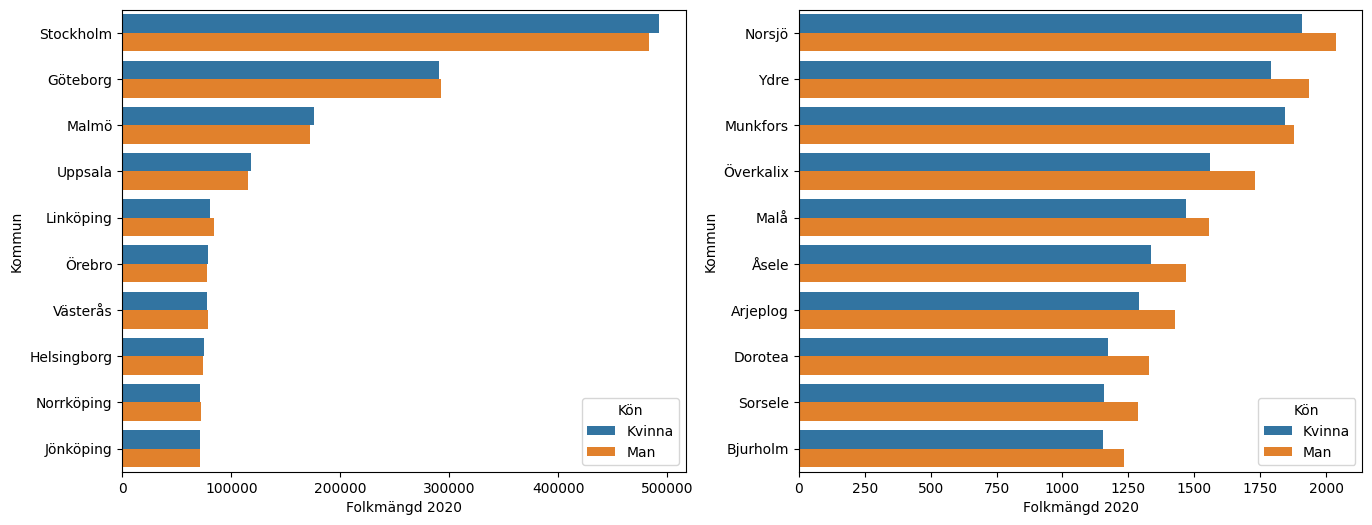

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ten_largest = merged_total_df.nlargest(20, "Total Pop 2020")
ten_smallest = merged_total_df.nsmallest(20, "Total Pop 2020").sort_values(
    "Total Pop 2020", ascending=False
)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
sns.barplot(data=ten_largest, x="Folkmängd 2020", y="Kommun", hue="Kön", ax=ax[0])
sns.barplot(data=ten_smallest, x="Folkmängd 2020", y="Kommun", hue="Kön", ax=ax[1])

f) Create a pie chart showing the total male and female population in Sweden 2020.


Text(0.5, 1.0, 'Total male and female population in Sweden in 2020')

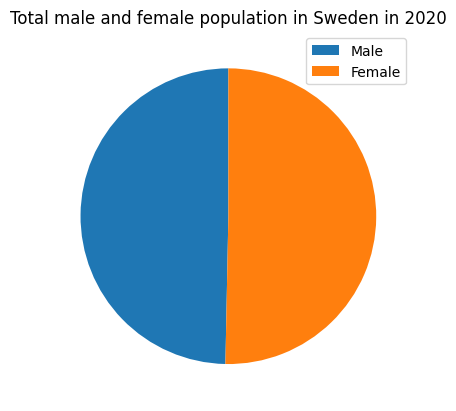

In [9]:
import numpy as np

total_pop = merged_total_df["Folkmängd 2020"].sum()
female_pop = merged_total_df.loc[merged_total_df["Kön"] == "Kvinna"]
female_pop = female_pop["Folkmängd 2020"].sum()

male_pop = merged_total_df.loc[merged_total_df["Kön"] == "Man"]
male_pop = male_pop["Folkmängd 2020"].sum()

y = np.array([female_pop, male_pop])
labels = ["Male", "Female"]

plt.pie(y, startangle=90)
plt.legend(labels=labels)
plt.title("Total male and female population in Sweden in 2020")

g) Create a barplot showing the cities with the five largest percentual gender difference in 2020.


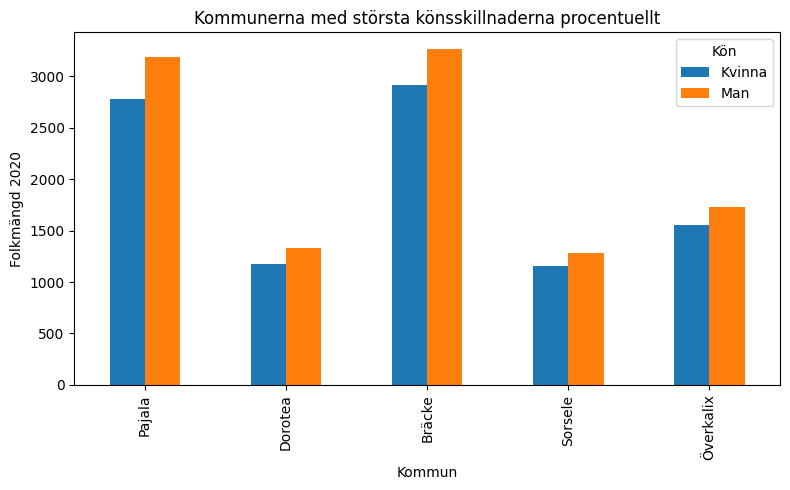

In [ ]:
new_df = merged_total_df

new_df["Andel 2020 (%)"] = new_df["Folkmängd 2020"] / new_df["Total Pop 2020"] * 100
gender_pivot = new_df.pivot(columns=["Kön"], values="Andel 2020 (%)")

gender_pivot["Skillnad (%)"] = (gender_pivot["Kvinna"] - gender_pivot["Man"]).abs()
top5_kommuner_list = (
    gender_pivot.sort_values("Skillnad (%)", ascending=False).head(5).index.to_list()
)

top5_with_share = new_df.loc[new_df.index.isin(top5_kommuner_list)].copy()

top5_final_df = top5_with_share.pivot(columns="Kön", values="Folkmängd 2020").loc[
    top5_kommuner_list
]

top5_final_df

ax = top5_final_df.plot(kind="bar", figsize=(8, 5))
ax.set_title("Kommunerna med största könsskillnaderna procentuellt")
ax.set_xlabel("Kommun")
ax.set_ylabel("Folkmängd 2020")
ax.legend(title="Kön")
plt.tight_layout()

h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020


[Text(0.5, 1.0, 'De 5 kommuner med störst procentuell förändring'),
 Text(0, 0.5, 'Populationsförändring i %')]

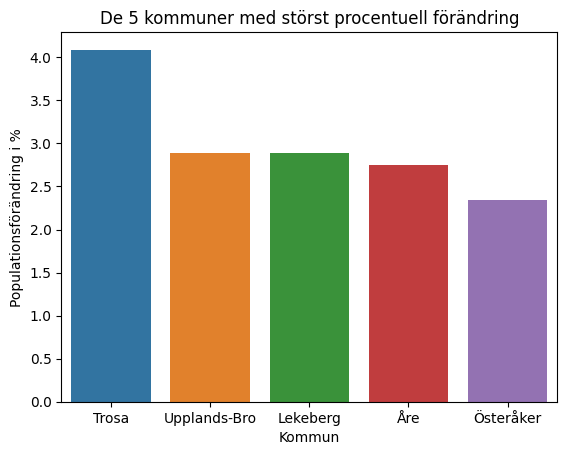

In [26]:
sorted_df = merged_total_df.sort_values(by="Total förändring", ascending=False)

deduped_df = sorted_df.drop_duplicates(subset=["Total förändring"])
deduped_df = deduped_df.head(5)

sns.barplot(data=deduped_df, x="Kommun", y="Total förändring", hue="Kommun").set(
    title="De 5 kommuner med störst procentuell förändring", ylabel="Populationsförändring i %"
)